<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/L7_3Wiener_Filtering_Additive_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

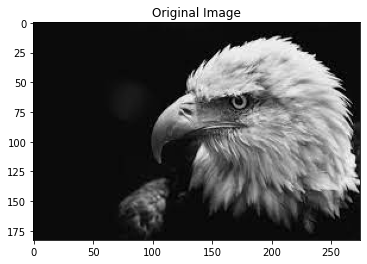

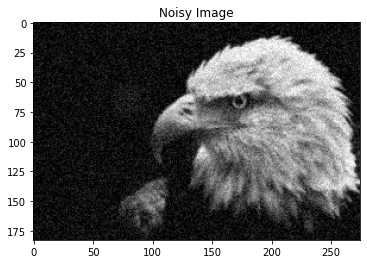

RMS error before Wiener filtering: 18.261619000176452


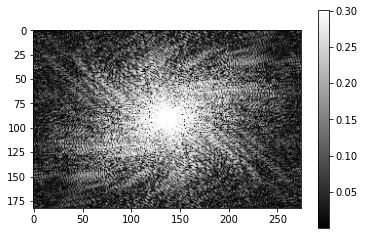

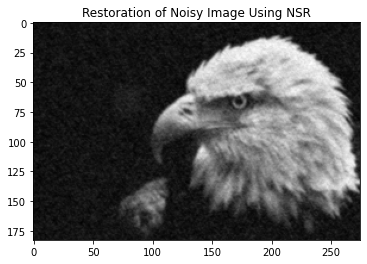

RMS error after Wiener filtering: 12.636507281476009


In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import urllib.request

# load image
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/eagle.jfif'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
Img = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE) / 255.0

# show original image
plt.figure(1)
plt.imshow(Img, cmap='gray')
plt.title('Original Image')
plt.show()

# simulate additive Gaussian noise
noise_mean = 0
noise_var = 0.005
noisyImg = cv2.GaussianBlur(Img, (3, 3), 0)
noisyImg = np.clip(noisyImg + np.sqrt(noise_var) * np.random.randn(*noisyImg.shape), 0, 1)

# show noisy image
plt.figure(2)
plt.imshow(noisyImg, cmap='gray')
plt.title('Noisy Image')
plt.show()

# perform Wiener Filtering on noisy image
dif = 255 * (noisyImg - Img)
rms_error_before_wnr = np.sqrt(np.mean(dif**2))
print('RMS error before Wiener filtering:', rms_error_before_wnr)

noisy_dft = np.fft.fft2(noisyImg) # DFT of noisy image
Img_psd = np.abs(np.fft.fft2(Img))**2 # original image PSD
noise_psd = np.prod(Img.shape) * noise_var # white noise PSD
wnr_H = Img_psd / (Img_psd + noise_psd) # Wiener transfer function

plt.figure(3)
plt.imshow(np.fft.fftshift(np.log10(1 + wnr_H)), cmap='gray')
plt.colorbar()
plt.show()

wnr_dft = noisy_dft * wnr_H # DFT of filtered image
wnr = np.real(np.fft.ifft2(wnr_dft)) # converted back to spatial domain

# show Wiener filtered image
plt.figure(4)
plt.imshow(wnr, cmap='gray')
plt.title('Restoration of Noisy Image Using NSR')
plt.show()

dif = 255 * (wnr - Img)
rms_error_after_wnr = np.sqrt(np.mean(dif**2))
print('RMS error after Wiener filtering:', rms_error_after_wnr)
